# Machine Intelligence 2 
## Exercise Sheet 2: PCA: batch preprocessing and online-PCA
### Coding Solutions

In [1]:
# import libraries that we are going to need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
plt.rcParams.update({
    "text.usetex": False,  # Enable LaTeX rendering
    "font.family": "serif",  # Use serif fonts
    "font.serif": ["Times New Roman"],  # Match LaTeX default
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}) # just some global font settings for matplotlib (not necessary)

In [2]:
# This time we are going to implement a PCA class (with operations known from the last sheet) right from the beginning
# and we are going to use it for the exercises (obviously we can mostly just copy and paste it)
# In the hope of avoiding confusion I already added all the functions that I will need for the following exercises to this class and com-
# mented which functions are specifically needed for an exercise, so you can always take a look at them here when we arrive at the exercise 

class PCA: 

    def __init__(self,data,name=''): # data needs to be in shape (p,.) for whole class
        self.name=name
        self.data = data
        self.dim=self.data.shape[1]
        self.data_c=self.data-self.data.mean(axis=0) # center data
        self.C=np.cov(self.data_c,rowvar=False) # compute cov matrix
        evals,PCs=np.linalg.eigh(self.C) # compute Evals and PCs
        sorter=np.argsort(evals)[::-1]; self.evals=evals[sorter];
        self.PCs=PCs[:,sorter]# sort PCs in descending order of evals
    
    # get Evals and PCs
    def PCA(self): 
        return self.evals,self.PCs
        

    # get first n PCs
    def first_n_PCs(self,n): 
        return self.PCs[:,:n]
        
    # project some data on PCs 
    def project_n_PCs(self,data,n): 
        u=data@self.PCs[:,:n]
        return u # returns projection in shape (p,dim)

    # Reconstruct data from projection (projection shape needs to be (p,.))
    def reconstruction(self,project): # projection is an argument and its shape determines how many PCs we use for reconstruction
        data_r=project@self.PCs[:,:project.shape[1]].T
        return data_r



     # screeplot for n PCs (will need for H2.2)
    def scree_plot(self,comp_evals,comp_name,n): # Evals for comparison and a corresponding name are arguments
        i=np.arange(1,n+1,1) # PC index
        fig=plt.figure(figsize=(4,4))
        plt.bar(i,self.evals[:n],color='r',width=0.3,label=self.name) # Screeplot for own Evals
        plt.bar(i,comp_evals[:n],align='edge',width=0.25,label=comp_name) # Screeplot for Evals from argument
        plt.xlabel("$i$")
        plt.ylabel("$\lambda_{i}$")
        plt.legend()
        plt.show()
    
    # scatter plot of 2d data with plotted PCs (will need for H2.1)
    def scatter2d(self,title):
        fig=plt.figure(figsize=(3,3))
        plt.scatter(self.data_c[:,0],self.data_c[:,1],marker='.',s=1,color='b') # scatter plot of data
        plt.arrow(0, 0, 5*self.PCs[0,0], 5*self.PCs[1,0], head_width=0.5, head_length=0.5, fc='red', ec='red') # arrow for PC1
        plt.text( 5*self.PCs[0,0]- 5, 5*self.PCs[1,0] -1.5, '$PC_1$', fontsize=12, color='red') 
        plt.arrow(0, 0, 5*self.PCs[0,1], 5*self.PCs[1,1], head_width=0.5, head_length=0.5, fc='black', ec='black') # arrow for PC2
        plt.text(5*self.PCs[0,1] + 0.5, 5*self.PCs[1,1] + 0.05, '$PC_2$', fontsize=12, color='black')
        plt.xlim(-15,15)
        plt.ylim(-15,15)
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$').set_rotation(0)
        plt.title(title)
        plt.show()
        

    # scatter plot of 2d data in PC space (will need for H2.1)
    def scatter2d_pc(self,title):
        # project data into PC space
        proj=self.project_n_PCs(self.data_c,n=self.dim)
        
        # plot
        fig=plt.figure(figsize=(3,3))
        plt.scatter(proj[:,0],proj[:,1],marker='.',s=1,color='b') # scatter plot of projected data
        plt.xlim(-15,15)
        plt.ylim(-15,15)
        plt.xlabel('$PC_1$')
        plt.ylabel('$PC_2$').set_rotation(0)
        plt.title(title)
        plt.show()


    # heatmap of some cov matrix (will need for H2.2)
    def heatmap(self,cov,title):
        fig=plt.figure()
        plt.imshow(cov) # heatmap
        plt.colorbar() # colorbar at the side
        plt.title(title)
        ax1=plt.gca()
        ax1.set_axis_off() # get rid of the axes' values
        plt.show()

### H2.1

#### (a) Load the dataset pca2.csv. Compute the Principal Components PC1 and PC2 and plot the data in the coordinate system PC2 vs. PC1. – What do you observe?

(500, 2)


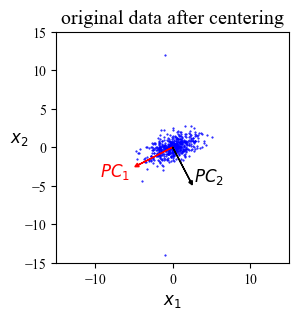

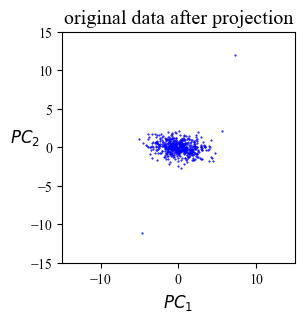

In [4]:
# load dataset
X1=np.loadtxt('data/pca2.csv',delimiter=',',skiprows=1)
print(X1.shape) # check shape (always a good idea)

# compute and plot PCs
x1_pca=PCA(X1) # initalize instance of our PCA class (PCAs computed automatically as they are in init fucntion)
x1_pca.scatter2d('original data after centering')

# plot data in PCA space
x1_pca.scatter2d_pc('original data after projection')

#### (b) Remove observations 17 and 157 (subtract 1 for zero-based indexing) and redo the above. – What is the difference?

(498, 2)


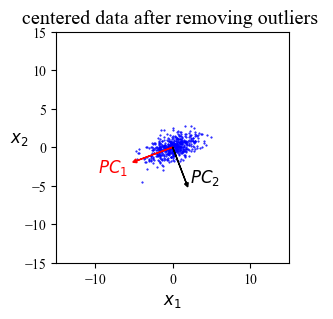

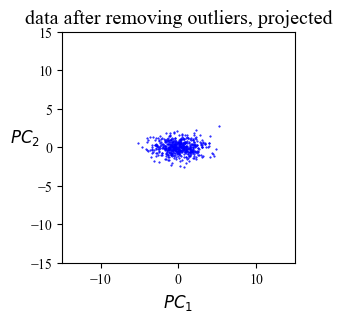

In [5]:
# remove outliers from dataset
X2=np.delete(X1,[16,156],axis=0)
print(X2.shape)


# compute and plot PCs
x2_pca=PCA(X2) # initalize instance of our PCA class
x2_pca.scatter2d('centered data after removing outliers ')

# plot data in PCA space
x2_pca.scatter2d_pc('data after removing outliers, projected')

### H2.2

#### (a) Load the dataset pca4.csv and visually inspect for outliers in the individual variables.Come up with a simple heuristic to remove the outliers from the data and proceed with using the “cleaned” data in all the next steps.

(500, 4)


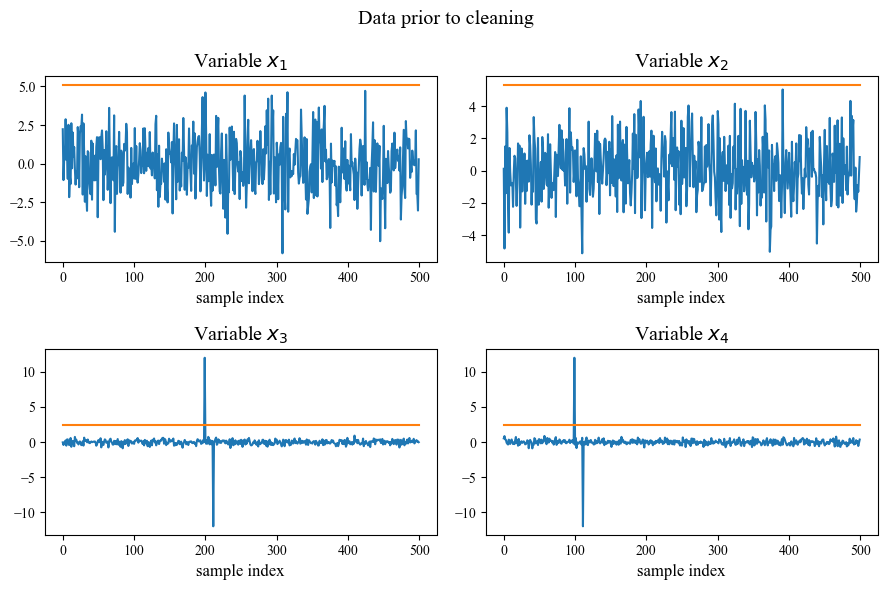

(496, 4)


In [7]:
# load dataset
X4=np.loadtxt('data/pca4.csv',delimiter=',',skiprows=1)
print(X4.shape) # check shape (always a good idea)

# Plot Data and e.g. check how many standard deviations could be a good heuristic 
plt.figure(figsize=(9, 6))
for i  in range(X4.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.plot(X4[:,i])
    plt.plot(3*np.std(X4[:,i])*np.ones(X4[:,i].shape))
    plt.title('Variable $x_{}$'.format(i+1))
    plt.xlabel('sample index')
plt.suptitle('Data prior to cleaning')
plt.tight_layout()
plt.show()


# Remove Outliers: e.g. more than 3 std away

stds=np.std(X4,axis=0)
# boolean array of shape (500) about data points we want to keep (want to keep datapoints which are within 3std for Var3,4 
#(for others anyway,see graph))
mask=(np.abs(X4[:,2])<np.abs(3*stds[2]))&(np.abs(X4[:,3])<np.abs(3*stds[3]))
X4_clean=X4[mask,:] # use mask to only keep data fulfilling above conditions
print(X4_clean.shape) # check how many we did remove



#### (b) Perform PCA on a reasonable subset of this data. Use a scree plot to determine how many PCs represent the data well.

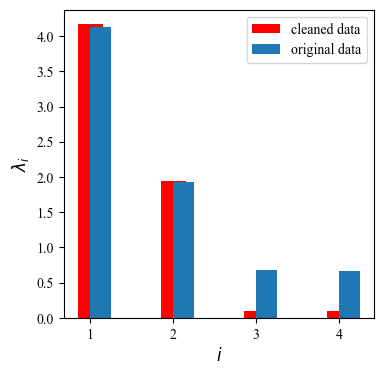

In [8]:
# take a reasonably large random subset: here we see by trying out, that we can even take the full set
rng=np.random.default_rng()
batch_ind=rng.choice(X4_clean.shape[0],size=int(X4_clean.shape[0]//1),replace=False)
X4_clean_r=X4_clean[batch_ind]

# perform PCA on cleaned an origial dataset using our PCA class
x4_clean_pca=PCA(X4_clean_r,name='cleaned data')
x4_original_pca=PCA(X4,name='original data')

# plot screeplot: we compare data without outliers to original data using our PCA class
x4_clean_pca.scree_plot(x4_original_pca.evals,'original data',4)



#### (c) “Sphere”/“Whiten” the data, i.e. transform the data into 4 new uncorrelated-unit-variance variables. Each new variable should have mean 0 and a standard deviation equal to 1. This can be done e.g. using the transformation

In [9]:
# Sphere and Whiten
proj=x4_clean_pca.project_n_PCs(X4_clean_r,4) # project data
V=np.diag(x4_clean_pca.evals**(-1/2))@proj.T # normalize data

#### (d)  Generate 3 heatmap plots. Specifically a heatmap of: (i) the 4 ×4 covariance matrix C, (ii) the covariance matrix of the data projected onto all 4 PCs, i.e. M⊤X, and (iii) the covariance matrix of the transformed variables vi.

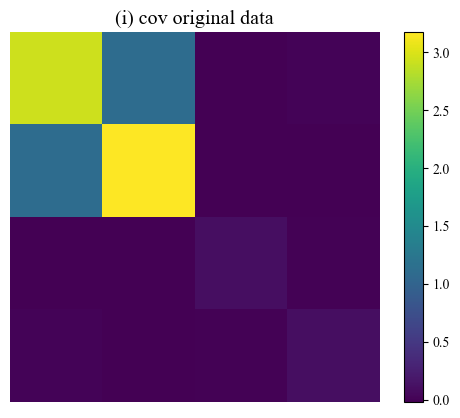

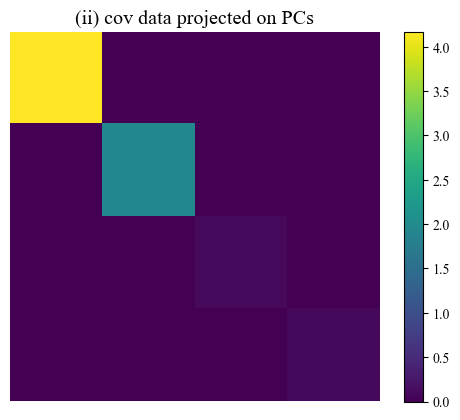

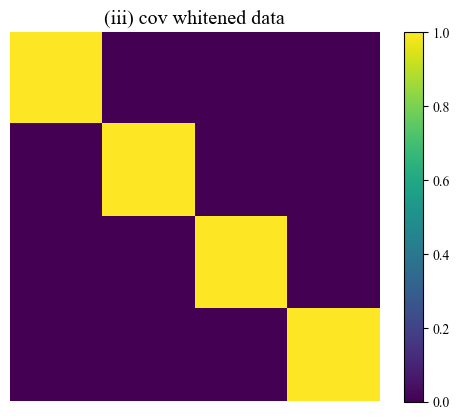

In [10]:
# heatmap of C
x4_clean_pca.heatmap(x4_clean_pca.C, '(i) cov original data')

# heatmap of cov of proj X
x4_clean_pca.heatmap(np.cov(proj.T), '(ii) cov data projected on PCs')

# heatmap of cov of  V
x4_clean_pca.heatmap(np.cov(V), '(iii) cov whitened data')

#### H2.4

#### (a) Produce a scatter plot of the data and indicate the time index by the color of the datapoints. You can break the full dataset into 10 blocks corresponding to 1 second length each and use 10 different colors, 1 color for each block.

(2000, 2)


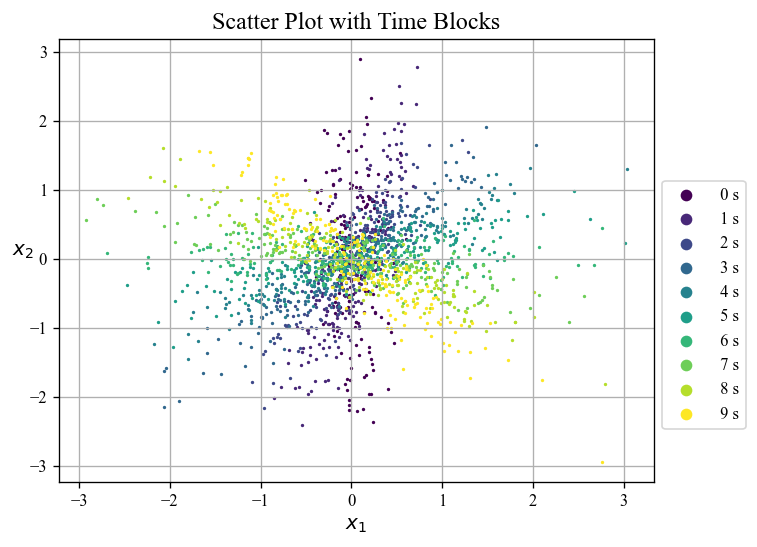

In [12]:
# load data
Xo=np.loadtxt('data/data-onlinePCA.txt',delimiter=',',skiprows=1, usecols=(1,2))
print(Xo.shape) #check shape

# create array of time blocks
n=int(Xo.shape[0]//10) # number of values per block
ts=np.repeat(np.arange(10),n) # array of time blocks

# plot data

# define a function to plot data colored by its belonging to a time block and arrows for later
def plt_tdata(T,X,a=False,arrows=None,title='Scatter Plot with Time Blocks'):
    colors=plt.cm.viridis(np.linspace(0, 1, 10)) # color for each time block 
    
    fig, ax = plt.subplots(dpi=120) # using subplot to create one plot, but get an axis object
    for i in range(10):
        ax.scatter(X[T == i,0], X[T == i,1], s=1, color=colors[i], label=f' {i} s') # plot data for each time block
        
        if a: # if want to plot arrows (for later)
            # fix length of direction vector (just for visualization purposes)
            direction = arrows[i] 
            arrow_len = 1.5 # fixed length
            dx, dy= arrow_len*direction 

            # draw arrow from (0,0) to (dx,dy)
            plt.arrow(0, 0, arrow_len * direction[0], arrow_len * direction[1],
                  color=colors[i], head_width=0.2, head_length=0.2, length_includes_head=True)
            
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.4), fontsize='small',markerscale=6)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$',rotation=0)
    plt.title(title)
    plt.grid()
    plt.show()

# plot data using function
plt_tdata(ts,Xo)

#### (b) Determine the principal components, using batch PCA, for each of the 10 blocks separately. Plot the direction of first PC for each block (e.g. as an arrow or the endpoint of it) together with the original data.

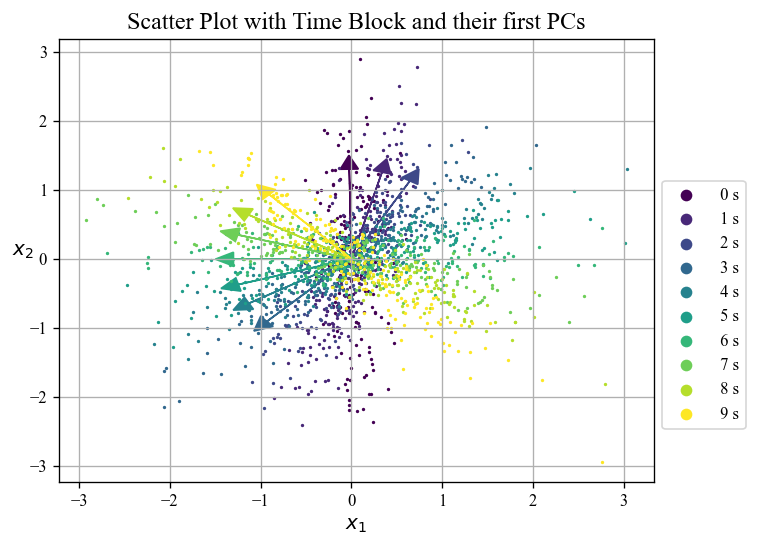

In [13]:
# batch (normal) PCA using our class
PCs=np.zeros((10,2))

# determine PCs
for i in range(10): # iterate over blocks
    xo_pca=PCA(Xo[i*n:(i+1)*n,:]) # determine PCs using our PCA function for a block
    PCs[i,:]=xo_pca.first_n_PCs(1).reshape(-1) # load into PCs array
    
#plot data and arrows in direction of PCs
plt_tdata(ts,Xo,a=True,arrows=PCs,title='Scatter Plot with Time Block and their first PCs')    

#### (c) Implement Oja’s rule and apply it with a learning rate parameter ε ∈{0.002, 0.04, 0.45}to the dataset. In each iteration, take the next3 data point and apply the learning step. Plot the weights at each timestep (as points whose x vs. y coordinates are given by the weight for x and y) in the same plot as the original data. Use the colors from (a) to indicate the time index for each plotted weight.

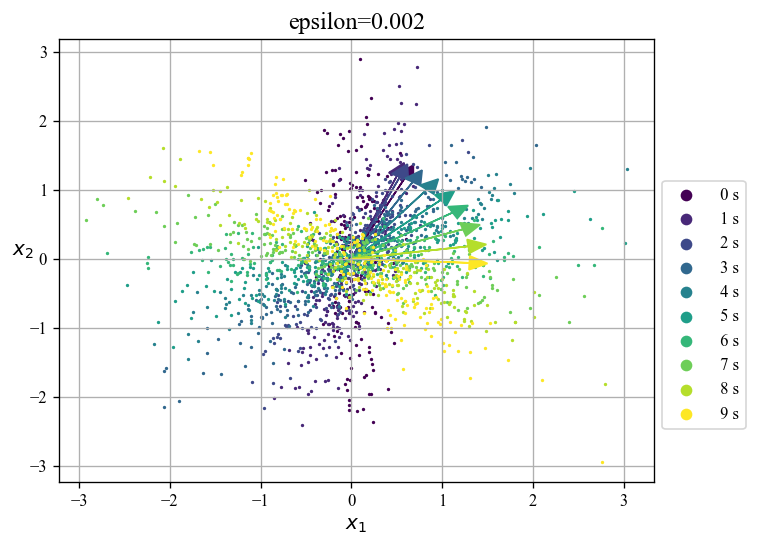

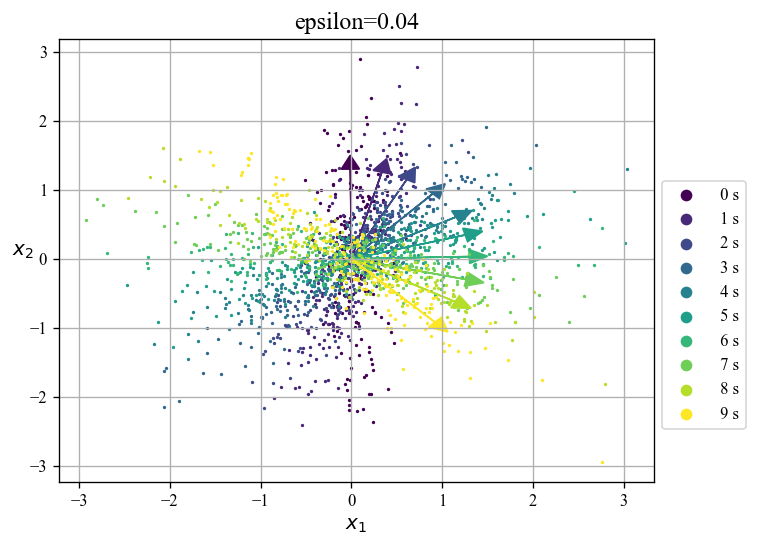

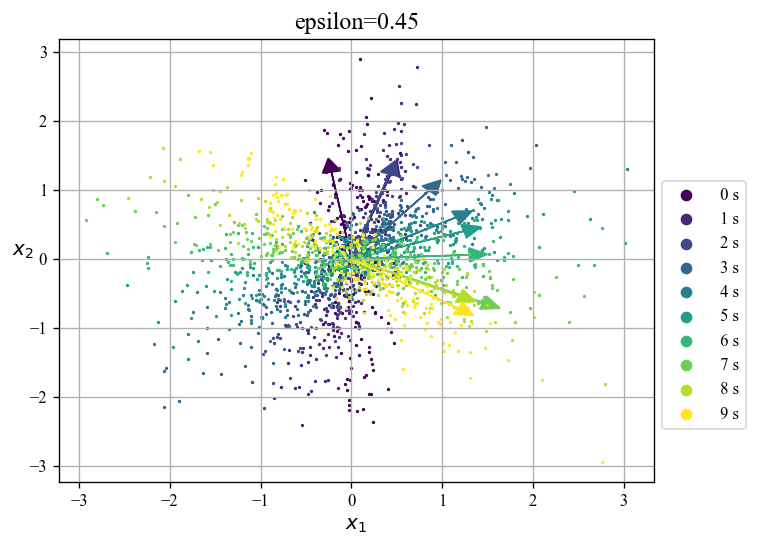

In [14]:
# list of epsilons
eps=np.array([0.002,0.04,0.45])

# function implementing Oja's rule
def onl_pca(xc,eps,pmax=2000): # takes dataset, epsilon and max #datapoints iterated through

    # initialize weight with random vector
    min=np.array([0,0])
    max=np.array([1,1])
    w=np.random.uniform(low=min,high=max,size=(2,))
    
    ws=[]
    # iterate over datapoints
    for i in range(pmax):
        x=xc[i,:] # current datapoint
        y=w.T@x 

        # updating w following Oja's rule
        w=w+eps*y*(x-y*w)

        # save w's at end of each time block
        if (i+1)%200==0:
            ws.append(w)
            
    return np.array(ws)


# calulate weights (ie first PC over training time)
ws1=onl_pca(Xo,eps[0])
ws2=onl_pca(Xo,eps[1])
ws3=onl_pca(Xo,eps[2])


# plot as in (b)
plt_tdata(ts,Xo,a=True,arrows=ws1, title= 'epsilon=0.002') 
plt_tdata(ts,Xo,a=True,arrows=ws2, title= 'epsilon=0.04')
plt_tdata(ts,Xo,a=True,arrows=ws3, title= 'epsilon=0.45') 
